In [56]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import r2_score
from sklearn import svm

## Reading the Data 

In [16]:
df = pd.read_csv('StockX-ML-Data.csv', parse_dates=True)

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Percent Change,Days Since Release,Original Release
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/16,11.0,California,398.636364,1665,0
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/16,11.0,California,211.363636,1605,0
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/16,11.0,California,213.636364,1605,0
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/16,11.5,Kentucky,388.636364,1605,0
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/17,11.0,Rhode Island,276.363636,1525,0


## Data Preprocessing

In [17]:
# Label encoding the states to have values from 0 - 49
# Instatniate LabelEncoder
label_encoder = LabelEncoder()

# LabelEncode
df['Buyer Region'] = label_encoder.fit_transform(df['Buyer Region']) # CA, NY, etc.
df['Color'] = label_encoder.fit_transform(df['Sneaker Name']) # Colorway
df['Brand'] = label_encoder.fit_transform(df['Brand']) # Yeezy, Nike


In [18]:
# Parsing data times and creating month column
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

# Inspecting newly created 
# df.head()

Now that we have preprocessed the data - our next task is to create the matrices:

In [19]:
# Separating features and target output
# X = np.array(df[["Order Date", "Brand", "Retail Price", "Release Date", "Shoe Size", "Buyer Region", "Percent Change", "Days Since Release", "Original Release", "Color"]])
# Y = np.array(df["Sale Price"])

# Checking shape of matrices
# print(X)
#print(Y.shape)

[[Timestamp('2017-09-01 00:00:00') 0 220 ... 1665 0 5]
 [Timestamp('2017-09-01 00:00:00') 0 220 ... 1605 0 8]
 [Timestamp('2017-09-01 00:00:00') 0 220 ... 1605 0 9]
 ...
 [Timestamp('2019-02-13 00:00:00') 0 220 ... 842 0 49]
 [Timestamp('2019-02-13 00:00:00') 0 220 ... 842 0 49]
 [Timestamp('2019-02-13 00:00:00') 0 220 ... 842 0 49]]


## Data Visualization

## Linear Regression
#### Given a shoe's information, can we predict its resale price?

In [66]:
# Retrieving feature data and target variable
X = df[['Brand', 'Retail Price', 'Shoe Size', 'Buyer Region', 'Color', "Days Since Release", "Original Release", 'Month', 'Year']]

y = df['Sale Price']
N = X.shape[0]

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

# N_1 = X_train.shape[0]
# N_2 = X_test.shape[0]

# print(N_1)
# print(N_2)

## Linear Regression

Plain old linear regression to start us off.

In [67]:
def linregression_model(X_train, y_train, X_test, y_test):
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train.ravel())
    y_hat_train = linear_regression.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = linear_regression.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()

In [68]:
linregression_model(X_train, y_train, X_test, y_test)

Accuracy on training data (r^2): 0.452212
Accuracy on testing data (r^2): 0.448372



## Linear Regression using Lasso Regularization

We will set it up so that it takes in different cost values

In [73]:
acc_train_lassoreg = [] 
acc_test_lassoreg = []
c_lassoreg = []

def lassoregression_model(C, X_train, y_train, X_test, y_test):
    lassoreg = Lasso(alpha=C)
    lassoreg.fit(X_train, y_train.ravel())
    y_hat_train = lassoreg.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    acc_train_lassoreg.append(acc_train)
    print("Alpha = ", c)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = lassoreg.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    acc_test_lassoreg.append(acc_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()
    c_lassoreg.append(C)

In [74]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    lassoregression_model(c, X_train, y_train, X_test, y_test)

Alpha =  0.0001
Accuracy on training data (r^2): 0.452212
Accuracy on testing data (r^2): 0.448372

Alpha =  0.001
Accuracy on training data (r^2): 0.452212
Accuracy on testing data (r^2): 0.448374

Alpha =  0.01
Accuracy on training data (r^2): 0.452211
Accuracy on testing data (r^2): 0.448387

Alpha =  0.1
Accuracy on training data (r^2): 0.452068
Accuracy on testing data (r^2): 0.448411

Alpha =  1
Accuracy on training data (r^2): 0.450417
Accuracy on testing data (r^2): 0.447371

Alpha =  10
Accuracy on training data (r^2): 0.425670
Accuracy on testing data (r^2): 0.423441



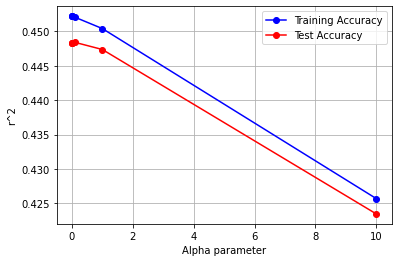

In [75]:
plt.plot(c_lassoreg, acc_train_lassoreg, 'bo-') 
plt.plot(c_lassoreg, acc_test_lassoreg,'ro-') 
plt.xlabel("Alpha parameter")
plt.ylabel("r^2")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## Linear Regression using Ridge Regularization

We will use the same alpha values as the previous lasso version

In [76]:
acc_train_ridgereg = []
acc_test_ridgereg = []
c_ridgereg = []

def ridgereg_model(C, X_train, y_train, X_test, y_test):
    ridgereg = Ridge(alpha=C)
    ridgereg.fit(X_train, y_train.ravel())
    y_hat_train = ridgereg.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    acc_train_ridgereg.append(acc_train)
    print("alpha = ", C)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = ridgereg.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    acc_test_ridgereg.append(acc_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()
    c_ridgereg.append(C)


In [78]:
for c in cVals:
    ridgereg_model(c, X_train, y_train, X_test, y_test)

alpha =  0.0001
Accuracy on training data (r^2): 0.452212
Accuracy on testing data (r^2): 0.448372

alpha =  0.001
Accuracy on training data (r^2): 0.452212
Accuracy on testing data (r^2): 0.448372

alpha =  0.01
Accuracy on training data (r^2): 0.452212
Accuracy on testing data (r^2): 0.448372

alpha =  0.1
Accuracy on training data (r^2): 0.452212
Accuracy on testing data (r^2): 0.448373

alpha =  1
Accuracy on training data (r^2): 0.452212
Accuracy on testing data (r^2): 0.448379

alpha =  10
Accuracy on training data (r^2): 0.452187
Accuracy on testing data (r^2): 0.448417



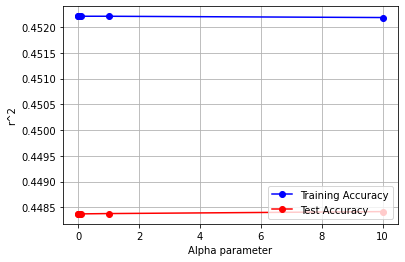

In [79]:
plt.plot(c_ridgereg, acc_train_ridgereg, 'bo-') 
plt.plot(c_ridgereg, acc_test_ridgereg,'ro-') 
plt.xlabel("Alpha parameter")
plt.ylabel("r^2")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Logistic Regression
#### Given a shoe, can we predict if its resale price doubled in price (with respect to its original retail price)?


In [108]:
# Retrieving feature data and target variable
X = df[['Brand', 'Retail Price', 'Shoe Size', 'Buyer Region', 'Percent Change', 'Days Since Release', 'Original Release', 'Color', 'Month', 'Year']]  

y = df['Sale Price']

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [109]:
# Instantiating a LogisticRegression instance
logistic_regression = LogisticRegression()

logistic_regression.fit( X_train, y_train )

y_hat_train = logistic_regression.predict( X_train )

print(y_hat_train)
print('Hi')

/Users/modouniang/Library/Python/2.7/lib/python/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Support Vector Machine